Run this in a terminal to make sure the shared folder is mounted (only at the beginning when booting up the VM.)

    sudo mount -t vboxsf -o uid=$UID,gid=$(id -g) simulation_results ~/Documents/sf_simulation_results/

Then compile the Cartilage Sheet Simulation app using make.

In [9]:
%%bash
cd ../chaste_build/
make CartilageSheetSimulation

[  5%] Built target timekeeper
[ 15%] Built target chaste_global
[ 15%] Built target chaste_linalg
[ 21%] Built target chaste_io
[ 26%] Built target chaste_ode
[ 42%] Built target chaste_mesh
[ 47%] Built target chaste_pde
[ 94%] Built target chaste_cell_based
Scanning dependencies of target chaste_project_cartilage
[ 94%] Building CXX object projects/cartilage/CMakeFiles/chaste_project_cartilage.dir/src/NodeBasedCartilageSheet.cpp.o
[ 94%] Building CXX object projects/cartilage/CMakeFiles/chaste_project_cartilage.dir/src/cell/cycle/CellTissueTypeBasedCellCycleModel.cpp.o
[ 94%] Linking CXX shared library libchaste_project_cartilage.so
[100%] Built target chaste_project_cartilage
Scanning dependencies of target CartilageSheetSimulation
[100%] Building CXX object projects/cartilage/apps/CMakeFiles/CartilageSheetSimulation.dir/src/CartilageSheetSimulation.cpp.o
[100%] Linking CXX executable CartilageSheetSimulation
[100%] Built target CartilageSheetSimulation


Now run the simulation using (set the flags to correspond to your experimental setup)

In [10]:
import distribute_executable as de

In [11]:
output_directory = 'dev/'
flags = ' --sbt --T 45.0 --F GLS_repulsion_only' # turn synchronized birth times on and set the final time to 45h
de.run_simulations_multiple_random_seeds(output_directory, flags=flags)

nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --output-dir dev/ --S 0 --sbt --T 45.0 --F GLS_repulsion_only
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --output-dir dev/ --S 1 --sbt --T 45.0 --F GLS_repulsion_only
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --output-dir dev/ --S 2 --sbt --T 45.0 --F GLS_repulsion_only
Starting simulations with 2 processes


In [4]:
list_of_flags = [' --output-dir '+ output_directory + flags + ' --sw 1', ' --output-dir '+ output_directory + flags + ' --sd 3']
de.run_simulations_list(list_of_flags=list_of_flags)

nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --S 0 --output-dir dev-setup_experiments/ --sbt --T 45.0 --sw 1
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --S 0 --output-dir dev-setup_experiments/ --sbt --T 45.0 --sd 3
Starting simulations with 2 processes


Note that the output from the bash subprocesses gets printed in the shell running the jupyter notebook server - check there for error messages!

Then run postprocessing. Note that the post processing currently assumes a simulation run time until at least T=45.0. And if there's no upper boundary it will encounter All-NaN slices and print out warnings.

In [5]:
list_of_directories = [output_directory, output_directory]
de.run_postprocessing_list(list_of_directories)

['/home/kubuntu1804/Documents/sf_simulation_results/dev-setup_experiments/0/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/dev-setup_experiments/0/results_from_time_0/']
Starting postprocessing with 2 processes


ValueError: cannot reshape array of size 9010 into shape (902,15)

You can generate a png visualizing clonal patches using

In [7]:
%%bash
pvpython analysis/paraview_show_clonal_patches.py -i /home/kubuntu1804/Documents/sf_simulation_results/dev-setup_experiments/0/

Input file path is /home/kubuntu1804/Documents/sf_simulation_results/dev-setup_experiments/0/


Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed 

And render the png using

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

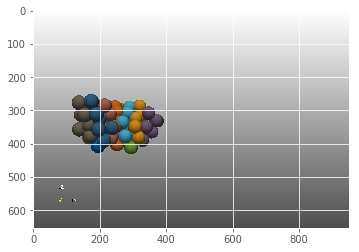

In [15]:
image = mpimg.imread("/home/kubuntu1804/Documents/sf_simulation_results/dev-setup_experiments/0/patches_t40.png")
plt.imshow(image)